#### imports

In [17]:
from qiskit import QuantumCircuit, assemble, Aer, execute
from qiskit.visualization import plot_bloch_multivector
from qiskit_textbook.tools import array_to_latex

#### create quantum circuit

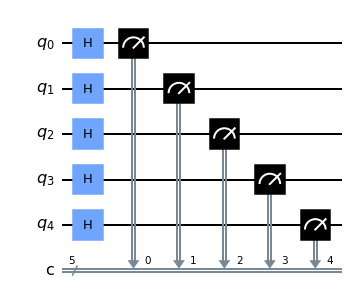

In [18]:
# Get # of qubits for quantum circuit
def get_qubits():
    n = int(input('Chose how many qubits to include in the quantum circuit (limit: 5) -> '))
    
    if n > 6:
        get_qubits()
    else:
        return n

n_qubits = get_qubits()


qc = QuantumCircuit(n_qubits, n_qubits)

for i in range(n_qubits):
    qc.h(i)

qc.measure(range(n_qubits), range(n_qubits))

qobj = assemble(qc)

qc.draw(output='mpl')

#### run on simulator

In [19]:
# simulator = Aer.get_backend('qasm_simulator')

# result = execute(qc, simulator, shots=1, memory=True).result()
# state = result.get_memory(qc)[0]

# print('statevector ->', state)

simulator = Aer.get_backend('statevector_simulator')

job = simulator.run(qobj)
statevector = job.result().get_statevector()

plot_bloch_multivector(statevector)

array_to_latex(statevector)

<IPython.core.display.Math object>

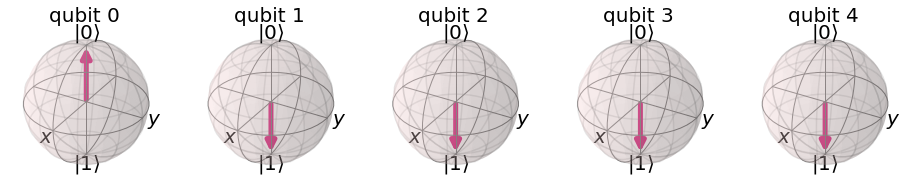

In [20]:
plot_bloch_multivector(statevector)

#### convert state to decimal

In [ ]:
def convert(state):

    decimal, exponent  = (0, 1)

    for bit in state:
        decimal += int(bit) * (1/2) ** exponent
        exponent += 1
    
    # NOTE: In the above for loop, we are converting the state to a number between 0 and 1.

    return decimal

print(convert(state))


0.96875
